### Análisis exploratorio del dataset de YELP (dataset de muestra con 15 mil registros).

In [2]:
#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
from wordcloud import WordCloud

In [3]:
# Carga de archivo de prueba con 15 mil registros: business Yelp 
business_yelp = pd.read_csv('C:\\Users\\felip\\Desktop\\Horizon\\Data\\samples\\sample_business.csv')
business_yelp.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state.1,postal_code.1,latitude.1,longitude.1,stars.1,review_count.1,is_open.1,attributes.1,categories.1,hours.1
0,R7tc4kaCmFDjrAOhbaRe7Q,Banelly Taqueria,901 S Missouri Ave,Clearwater,IN,33756,27.956081,-82.787425,4.0,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ex2HMTlX69xe1xFuUYeqJw,Lou Malnati's Pizzeria,"11435 Spring Mill Rd, Ste 170",Carmel,PA,46032,39.954000,-86.163850,4.0,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NPmZcLIGRthVuTjLq2WijQ,Treasure Valley Dermatology & Skin Cancer Center,6051 N Eagle Rd,Boise,IN,83713,43.659494,-116.355318,5.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Eliminar las columnas repetidas del DataFrame business_yelp directamente
business_yelp.drop(business_yelp.columns[14:], axis=1, inplace=True)
business_yelp.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   15000 non-null  object 
 1   name          15000 non-null  object 
 2   address       14485 non-null  object 
 3   city          15000 non-null  object 
 4   state         15000 non-null  object 
 5   postal_code   14994 non-null  object 
 6   latitude      15000 non-null  float64
 7   longitude     15000 non-null  float64
 8   stars         15000 non-null  float64
 9   review_count  15000 non-null  int64  
 10  is_open       15000 non-null  int64  
 11  attributes    13673 non-null  object 
 12  categories    14994 non-null  object 
 13  hours         12751 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.6+ MB


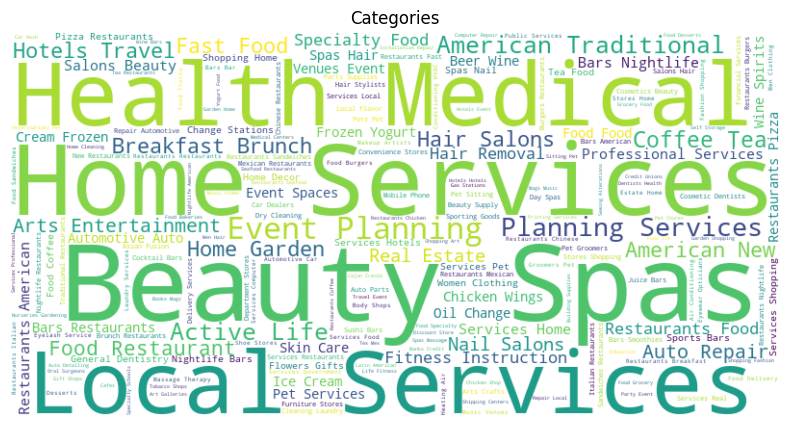

In [5]:
# Análisis campo Categories

# Convertimos las categorías en una sola cadena de texto
text = ' '.join(business_yelp['categories'].dropna().tolist())

# Procesamos la cadena de texto con WordCloud para generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Utilizamos Matplotlib para graficar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Categories')
plt.show()


In [7]:
categories_series = business_yelp['categories'].str.split(', ').explode()
# Contamos las categorías
category_counts = categories_series.value_counts()

# Mostramos el resultado
print(category_counts)

categories
Restaurants                5313
Food                       2710
Shopping                   2409
Beauty & Spas              1470
Home Services              1423
                           ... 
Mortuary Services             1
Water Stores                  1
Otologists                    1
Bookbinding                   1
Beach Equipment Rentals       1
Name: count, Length: 1104, dtype: int64


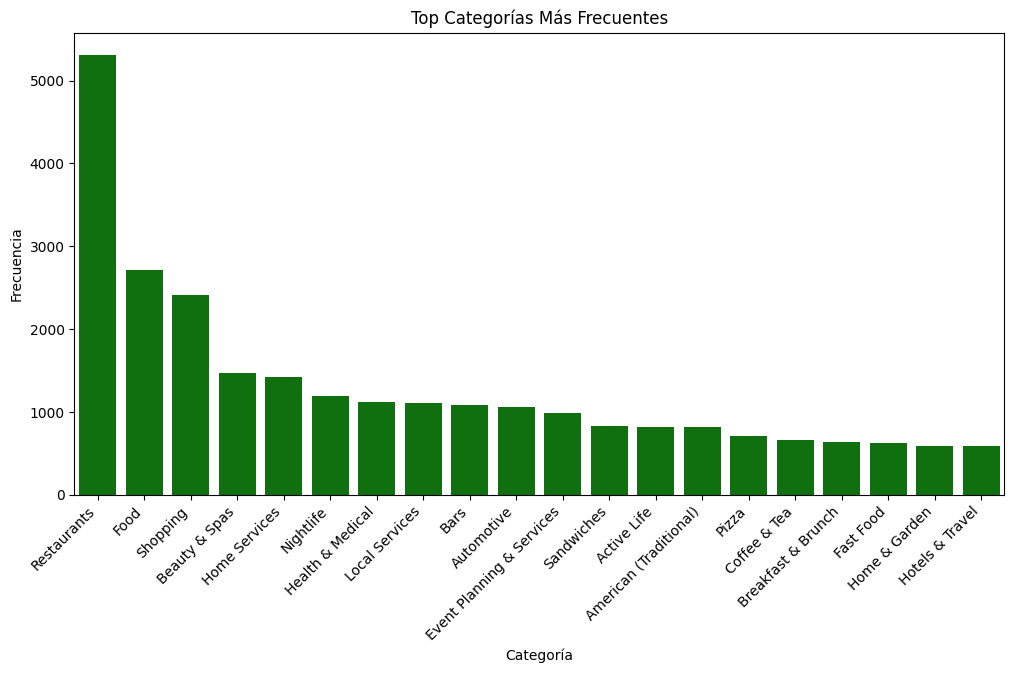

In [8]:
# Contamos las categorías
category_counts = categories_series.value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Seleccionamos las 10 categorías más frecuentes
top_categories = category_counts.head(20)

# Graficamos los resultados
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Count', data=top_categories, color='green')
plt.title('Top Categorías Más Frecuentes')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()



In [9]:
import math

def registros_en_radio(latitud_inicial, longitud_inicial, registros, distancia_km=10):
    # Aproximadamente 111 km por grado de latitud
    desplazamiento_latitud = distancia_km / 111
    latitud_minima = latitud_inicial - desplazamiento_latitud
    latitud_maxima = latitud_inicial + desplazamiento_latitud
    
    # Aproximadamente 111 km por grado de longitud, ajustado por la latitud
    desplazamiento_longitud = distancia_km / (111 * math.cos(math.radians(latitud_inicial)))
    longitud_minima = longitud_inicial - desplazamiento_longitud
    longitud_maxima = longitud_inicial + desplazamiento_longitud
    
    # Filtrar registros dentro del rango calculado
    registros_filtrados = registros[
        (registros['latitude'] >= latitud_minima) & (registros['latitude'] <= latitud_maxima) &
        (registros['longitude'] >= longitud_minima) & (registros['longitude'] <= longitud_maxima)
    ]
    
    return registros_filtrados



#### Realizamos prueba con un estadio de fútbol. Probamos la función fltrando por cercanía (radio: 10 km del estadio). 

In [11]:
# Mercedes Benz Stadium
latitud_inicial = 33.7575
longitud_inicial = -84.3963
distancia_km = 250

registros_filtrados = registros_en_radio(latitud_inicial, longitud_inicial, business_yelp, distancia_km)
print(registros_filtrados)


                  business_id                          name  \
116    UFgozownU_uvsG_iOZls6g         Curio Brewing Company   
143    SngmrFfYV6aytd-X7-WHfA             Four Paws Pet Spa   
339    4SNBjMscoQl7olFT7kgJXw             Papa John's Pizza   
450    9aDHwT-3RG7hAtgQxYr4yA             Quest Diagnostics   
480    _xmkgaXksU0wrVJP1rg8ug                       Walmart   
...                       ...                           ...   
14580  Vj0MrliGG_VGnD_8vijTtA                   Red Lobster   
14727  S0DD7L0Cu-fzIkzHEmjzTg                    McDonald's   
14873  juU0THi7QojPDnGuxlH5Sg           Gyro Cafe of Smyrna   
14946  dqhYXtw1P--1MpxBKQMk-g                   Chick-fil-A   
14959  79pXD5Km-J-p2Vj22MuAdw  Omikoshi Japanese Restaurant   

                                                 address      city state  \
116                                          216 Noah Dr  Franklin    AZ   
143                         5070 Carothers Pkwy, Ste 106  Franklin    TN   
339            

##### Encuentra locales recién a los 250 km. Probamos con otro estadio.

In [14]:
# "Bank of America Stadium", "lat": 35.2258, "lng": -80.8462
latitud_inicial = 35.2258
longitud_inicial = -80.8462
distancia_km = 500

registros_filtrados = registros_en_radio(latitud_inicial, longitud_inicial, business_yelp, distancia_km)
print(registros_filtrados)

                  business_id                                  name  \
3      KmRD7gWd4l3POC411jmJNg                     Indy Tv Mount LLC   
64     D-GYKmm0ZifvtHJLWJmocA  Rosebud Flowers & Gifts Indianapolis   
117    nsEcC9zc8BK2xz7zv9Fgdw                  Royal Pest Solutions   
253    4i-vytkm3K-l3J5hpeIBCw                          CVS Pharmacy   
270    MGWZ-BD-wMT7Pq_q8U-P9w                G.T. South's Rib House   
...                       ...                                   ...   
14766  YAsrUiA5OcQDvJXQtm4k-Q              Circle City Spuds & Grub   
14786  yb3uiM0YiMnoO-_JpCY7IA           Brandywine Creek State Park   
14827  SAwYDqChWpXm0ZNSUDJkNg                                 ERMCO   
14834  xL3I1F1SmlMcTG1_yykqwQ       The Cleaning Authority - Newark   
14929  5hID2DruRwIwit0BcLHTaw                               Dunkin'   

                          address          city state postal_code   latitude  \
3                             NaN  Indianapolis    PA       46239  

##### En esta oportunidad recién detecta locales a los 500 km. Intentamos con un nuevo estadio:

In [11]:
# Soldier Field", "lat": 41.8623, "lng": -87.6167
latitud_inicial = 41.8623
longitud_inicial = -87.6167
distancia_km = 250

registros_filtrados = registros_en_radio(latitud_inicial, longitud_inicial, business_yelp, distancia_km)
print(registros_filtrados)

                  business_id                                  name  \
1      Ex2HMTlX69xe1xFuUYeqJw                Lou Malnati's Pizzeria   
3      KmRD7gWd4l3POC411jmJNg                     Indy Tv Mount LLC   
57     52kHqSkzFNpj7-b31hmYOg           Strandz Hair Design Studios   
58     xQd6e11HMRKlobIlvo4XCQ                        Artisan Bakery   
64     D-GYKmm0ZifvtHJLWJmocA  Rosebud Flowers & Gifts Indianapolis   
...                       ...                                   ...   
14907  vNrFILL7SNflYMw9DSXCeg                                  Ixca   
14912  wg963I7vVBMNxW0lmSl_3w                  Alfred Angelo Bridal   
14914  f2kxNoOEdL3bAi_p2UrWxw                           The Oakmont   
14925  NL7FbNbhaljzwC4zw6OGaw                               Wendy's   
14992  ZVAkR29EWP8SvQYxUoleQw                        Beloved Brides   

                             address          city state postal_code  \
1      11435 Spring Mill Rd, Ste 170        Carmel    PA       46032   
3  

#### Nuevamente, locales detectados a los 250 km de distancia del estadio. 
#### Realizamos una visualización manual del dataset y detectamos registros de la ciudad de Nashville, donde conocemos la existncia de uno e los estadios.
#### Ejecutamos la función y graficamos.

                  business_id                      name  \
12     2STdNUM3QLhnPfZF5X9eBw         Downtown Cleaners   
19     vi5CbxgB_ondX_OmRVoM7Q        Jim's Coney Island   
32     Sd8NrlgB6SY6GEtIjPupfA      King Solomon's Gyros   
84     Eg5BtNkFNxseJ-L-XtmQxQ                   T Nails   
97     3yqN_naC1GZ-61Vldg369g                 Poke Nash   
...                       ...                       ...   
14838  SipD1Mi_-ILhpFwe1tGK7w  Belle Meade Skin & Laser   
14909  6hgQ2w-NOHnonfYDJFXvAg            Public Storage   
14911  9Sl3LvwKHhOW7Xhn7svcOA    Crawford Z Car Service   
14952  Yb5vZGdESHc3ZOKZq0o9BQ         Hart Ace Hardware   
14964  4ijsuCOtiM7k2AUi6dxivw              Tasti D-Lite   

                                                address       city state  \
12                                        206 4th Ave N  Nashville    LA   
19                                    4663 Trousdale Dr  Nashville    NJ   
32                                     716 Gallatin Ave  Nashvi

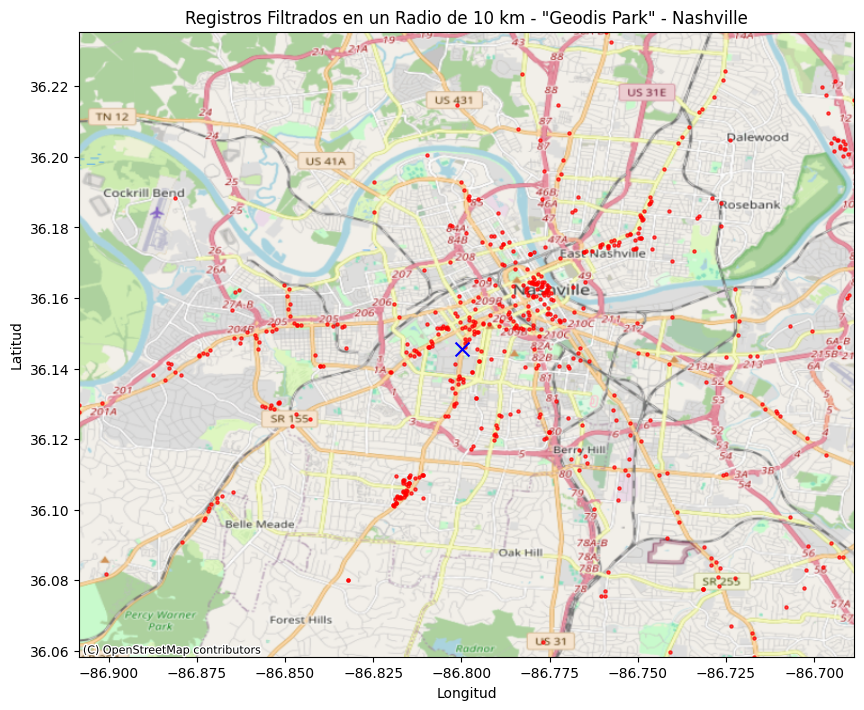

In [15]:
# Prueba con un punto en ciudad de NASHVILLE
latitud_inicial = 36.1456
longitud_inicial = -86.7998
distancia_km = 10

registros_filtrados = registros_en_radio(latitud_inicial, longitud_inicial, business_yelp, distancia_km)
print(registros_filtrados)

# Mapas satelitales

import contextily as ctx
from shapely.geometry import Point  # Importar Point
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

geo_nashville = gpd.points_from_xy(registros_filtrados['longitude'],registros_filtrados['latitude'])
gdf_nashville = gpd.GeoDataFrame(registros_filtrados, geometry=geo_nashville)

# Definir CRS (sistema de coordenadas)
gdf_nashville.set_crs(epsg=4326, inplace=True)

# Crear un punto para el centro
centro = gpd.GeoDataFrame(geometry=[Point(longitud_inicial, latitud_inicial)], crs="EPSG:4326")


# Configuración del gráfico
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar los puntos
gdf_nashville.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.7)

# # Cargar la imagen del geolocalizador
# img = plt.imread('geolocalizador.png')
# imagebox = OffsetImage(img, zoom=0.1)
# ab = AnnotationBbox(imagebox, (longitud_inicial, latitud_inicial), frameon=False)

# # Añadir el marcador de geolocalizador al gráfico
# ax.add_artist(ab)

# Graficar el punto central
centro.plot(ax=ax, marker='x', color='blue', markersize=100, label='Centro')

# Añadir el fondo del mapa satelital
# ctx.add_basemap(ax, crs=gdf_nashville.crs.to_string(), source=ctx.providers.Esri.WorldImagery)
ctx.add_basemap(ax, crs=gdf_nashville.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Ajustar la vista al área de interés
ax.set_xlim(gdf_nashville.total_bounds[[0, 2]])
ax.set_ylim(gdf_nashville.total_bounds[[1, 3]])

# Títulos y etiquetas
ax.set_title('Registros Filtrados en un Radio de 10 km - "Geodis Park" - Nashville')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.show()

#### Modificamos la función para graficar el país completo, revisando por cada estadio. 

In [17]:
# stadiums = [
#         {"name": "Mercedes-Benz Stadium", "lat": 33.7575, "lng": -84.3963},
#         {"name": "Bank of America Stadium", "lat": 35.2258, "lng": -80.8462},
#         {"name": "Soldier Field", "lat": 41.8623, "lng": -87.6167},
#         {"name": "TQL Stadium", "lat": 39.1030, "lng": -84.5164},
#         {"name": "Lower.com Field", "lat": 39.9636, "lng": -82.9988},
#         {"name": "Audi Field", "lat": 38.8737, "lng": -77.0020},
#         {"name": "DRV PNK Stadium", "lat": 26.0820, "lng": -80.2526},
#         {"name": "Geodis Park", "lat": 36.1456, "lng": -86.7998},
#         {"name": "Gillette Stadium", "lat": 42.0909, "lng": -71.2600},
#         {"name": "Yankee Stadium", "lat": 40.8296, "lng": -73.9262},
#         {"name": "Red Bull Arena", "lat": 40.7429, "lng": -74.1745},
#         {"name": "Exploria Stadium", "lat": 28.5428, "lng": -81.3792},
#         {"name": "Subaru Park", "lat": 39.8473, "lng": -75.3613},
#         {"name": "Q2 Stadium", "lat": 30.2970, "lng": -97.7085},
#         {"name": "Dick's Sporting Goods Park", "lat": 39.8056, "lng": -104.8771},
#         {"name": "Toyota Stadium", "lat": 33.1531, "lng": -96.8208},
#         {"name": "PNC Stadium", "lat": 29.7464, "lng": -95.3600},
#         {"name": "Banc of California Stadium", "lat": 34.0164, "lng": -118.2814},
#         {"name": "Dignity Health Sports Park", "lat": 33.8654, "lng": -118.2201},
#         {"name": "Allianz Field", "lat": 44.9790, "lng": -93.2260},
#         {"name": "Providence Park", "lat": 45.5215, "lng": -122.6768},
#         {"name": "Rio Tinto Stadium", "lat": 40.5601, "lng": -111.8888},
#         {"name": "PayPal Park", "lat": 37.3323, "lng": -121.9050},
#         {"name": "Lumen Field", "lat": 47.5951, "lng": -122.3316},
#         {"name": "Children's Mercy Park", "lat": 39.0972, "lng": -94.8410},
#         {"name": "Citypark", "lat": 38.6136, "lng": -90.2084}
# ]

In [18]:
# def registros_en_radio(latitud_inicial, longitud_inicial, registros, distancia_km=10):
#     # Aproximadamente 111 km por grado de latitud
#     desplazamiento_latitud = distancia_km / 111
#     latitud_minima = latitud_inicial - desplazamiento_latitud
#     latitud_maxima = latitud_inicial + desplazamiento_latitud
    
#     # Aproximadamente 111 km por grado de longitud, ajustado por la latitud
#     desplazamiento_longitud = distancia_km / (111 * math.cos(math.radians(latitud_inicial)))
#     longitud_minima = longitud_inicial - desplazamiento_longitud
#     longitud_maxima = longitud_inicial + desplazamiento_longitud
    
#     # Filtrar registros dentro del rango calculado
#     registros_filtrados = registros[
#         (registros['latitude'] >= latitud_minima) & (registros['latitude'] <= latitud_maxima) &
#         (registros['longitude'] >= longitud_minima) & (registros['longitude'] <= longitud_maxima)
#     ]
    
#     return registros_filtrados

In [19]:
import math
import pandas as pd

def registros_en_radio_multiple(registros, puntos_referencia, distancia_km=10):
    

    registros_filtrados = pd.DataFrame()
    for latitud_inicial, longitud_inicial in puntos_referencia:
        # Cálculo de los límites y filtrado, como en la función original
        desplazamiento_latitud = distancia_km / 111
        latitud_minima = latitud_inicial - desplazamiento_latitud
        latitud_maxima = latitud_inicial + desplazamiento_latitud
    
        # Aproximadamente 111 km por grado de longitud, ajustado por la latitud
        desplazamiento_longitud = distancia_km / (111 * math.cos(math.radians(latitud_inicial)))
        longitud_minima = longitud_inicial - desplazamiento_longitud
        longitud_maxima = longitud_inicial + desplazamiento_longitud

        registros_filtrados_temp = registros[
            (registros['latitude'] >= latitud_minima) & (registros['latitude'] <= latitud_maxima) &
            (registros['longitude'] >= longitud_minima) & (registros['longitude'] <= longitud_maxima)
        ]
        registros_filtrados = pd.concat([registros_filtrados, registros_filtrados_temp], ignore_index=True)

    # Eliminar duplicados si es necesario
    registros_filtrados = registros_filtrados.drop_duplicates()

    return registros_filtrados





In [26]:
puntos_referencia = [(33.7575, -84.3963), (35.2258, -80.8462), (41.8623, -87.6167), (39.1030, -84.5164), (39.9636, -82.9988), (38.8737, -77.0020),          
                      (26.0820, -80.2526), (36.1456, -86.7998), (42.0909, -71.2600), (40.8296, -73.9262), (40.7429, -74.1745), (28.5428, -81.3792), 
                      (39.8473, -75.3613), (30.2970, -97.7085), (39.8056, -104.8771), (33.1531, -96.8208), (29.7464, -95.3600), (34.0164, -118.2814), 
                      (33.8654, -118.2201), (44.9790, -93.2260), (45.5215, -122.6768), (40.5601, -111.8888), (37.3323, -121.9050), (47.5951, -122.3316), 
                      (39.0972, -94.8410), (38.6136, -90.2084),                       
]

registros_cercanos = registros_en_radio_multiple(business_yelp, puntos_referencia, distancia_km=10)

print(registros_cercanos)

                 business_id                  name  \
0     2STdNUM3QLhnPfZF5X9eBw     Downtown Cleaners   
1     vi5CbxgB_ondX_OmRVoM7Q    Jim's Coney Island   
2     Sd8NrlgB6SY6GEtIjPupfA  King Solomon's Gyros   
3     Eg5BtNkFNxseJ-L-XtmQxQ               T Nails   
4     3yqN_naC1GZ-61Vldg369g             Poke Nash   
...                      ...                   ...   
1115  ilMm5DJviWLqakujmBFGvQ   Shady Jack's Saloon   
1116  8OjV1BpnbxxbG8q-XVyPIA     Rehab Bar & Grill   
1117  UpR7l41tgf7E7wPB5HUhig    Zephyr Bar + Salon   
1118  XvASx-NBLP8yV4hDlNnUMg          Zippy Burger   
1119  xE_gaHHE6RozHueotbXSeg    Millbrook Pharmacy   

                                               address             city state  \
0                                        206 4th Ave N        Nashville    LA   
1                                    4663 Trousdale Dr        Nashville    NJ   
2                                     716 Gallatin Ave        Nashville    PA   
3                          

In [24]:
registros_cercanos

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,2STdNUM3QLhnPfZF5X9eBw,Downtown Cleaners,206 4th Ave N,Nashville,LA,37219,36.164120,-86.778810,2.5,7,0,NaN,"Laundry Services, Dry Cleaning & Laundry, Loca...",NaN
1,vi5CbxgB_ondX_OmRVoM7Q,Jim's Coney Island,4663 Trousdale Dr,Nashville,NJ,37204,36.082453,-86.758477,4.0,8,0,"{'RestaurantsAttire': ""u'casual'"", 'Ambience':...","Hot Dogs, Burgers, Restaurants, Chicken Wings","{'Monday': '11:0-16:0', 'Tuesday': '11:0-16:0'..."
2,Sd8NrlgB6SY6GEtIjPupfA,King Solomon's Gyros,716 Gallatin Ave,Nashville,PA,37206,36.184613,-86.748319,4.5,208,1,"{'Alcohol': ""u'none'"", 'BikeParking': 'True', ...","Greek, Mediterranean, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,Eg5BtNkFNxseJ-L-XtmQxQ,T Nails,"2613 Franklin Pike, Ste 104",Nashville,IN,37204,36.120086,-86.776636,2.0,13,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Day Spas, Beauty & Spas, Nail Salons","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."
4,3yqN_naC1GZ-61Vldg369g,Poke Nash,"5055 Broadway Place, Fl 2nd, Assembly Food Hall",Nashville,NV,37203,36.160194,-86.779744,4.0,13,1,NaN,"Restaurants, Hawaiian, Poke, Food","{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,ilMm5DJviWLqakujmBFGvQ,Shady Jack's Saloon,1432 N Broadway,Saint Louis,PA,63102,38.639014,-90.185523,4.0,29,1,"{'OutdoorSeating': 'True', 'BusinessAcceptsCre...","Restaurants, Bars, Nightlife, American (Tradit...",NaN
1116,8OjV1BpnbxxbG8q-XVyPIA,Rehab Bar & Grill,4054 Chouteau Ave,Saint Louis,NJ,63110,38.627717,-90.249973,3.5,55,1,"{'WiFi': ""u'free'"", 'BusinessParking': ""{'gara...","Bars, Gay Bars, Nightlife","{'Monday': '11:0-3:0', 'Tuesday': '11:0-3:0', ..."
1117,UpR7l41tgf7E7wPB5HUhig,Zephyr Bar + Salon,1924 Pestalozzi St,Saint Louis,FL,63118,38.599299,-90.218243,4.0,25,1,"{'RestaurantsGoodForGroups': 'True', 'ByAppoin...","Wine Bars, Hair Salons, Hair Removal, Waxing, ...","{'Wednesday': '12:0-19:0', 'Thursday': '12:0-1..."
1118,XvASx-NBLP8yV4hDlNnUMg,Zippy Burger,571 Melville Ave,Saint Louis,PA,63130,38.655708,-90.305480,4.0,37,0,"{'OutdoorSeating': 'True', 'RestaurantsGoodFor...","American (Traditional), Restaurants, Burgers","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


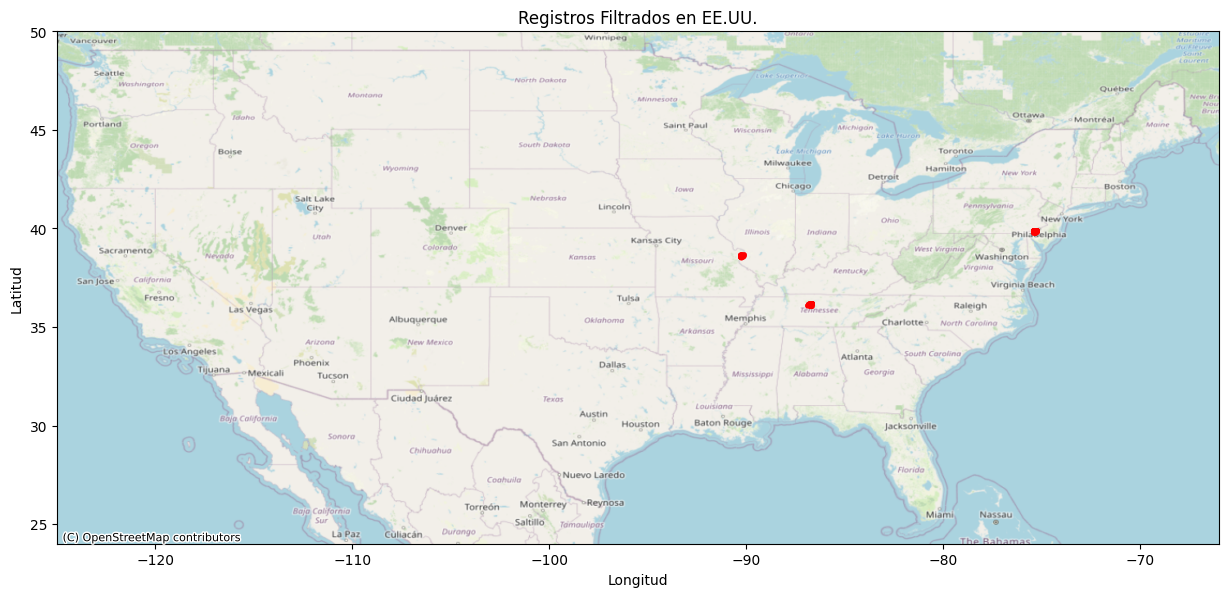

In [28]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

# Suponiendo que registros_cercanos es un DataFrame con columnas 'longitude' y 'latitude'
geo_stadium = gpd.points_from_xy(registros_cercanos['longitude'], registros_cercanos['latitude'])
gdf_stadium = gpd.GeoDataFrame(registros_cercanos, geometry=geo_stadium)

# Definir CRS (sistema de coordenadas)
gdf_stadium.set_crs(epsg=4326, inplace=True)

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(15, 15))

# Graficar los puntos
gdf_stadium.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.7)

# Ajustar la vista al área de EE.UU.
ax.set_xlim([-125, -66])
ax.set_ylim([24, 50])

# Añadir el fondo del mapa satelital
# ctx.add_basemap(ax, crs=gdf_stadium.crs.to_string(), source=ctx.providers.Esri.WorldImagery, zoom=4)
ctx.add_basemap(ax, crs=gdf_stadium.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik,zoom= 5)

# Títulos y etiquetas
ax.set_title('Registros Filtrados en EE.UU.')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.show()

#### Como puede observarse, el dataset de Yelp sólo nos muestra registros de tres (3) estadios de fútbol y dada la imposibilidad para extraer nuevos registros desde la API de Yelp, decidimos prescindir de esta fuente para continuar con el proyecto y focalizarnos en Google maps.

In [22]:
# import datetime

# def calcular_fecha_desde_milisegundos(milisegundos):
#     # Convierte milisegundos a segundos
#     segundos = milisegundos / 1000
    
#     # Fecha base (1 de enero de 1970)
#     fecha_base = datetime.datetime(1970, 1, 1)
    
#     # Calcula la fecha sumando los segundos
#     try:
#         fecha_actual = fecha_base + datetime.timedelta(seconds=segundos)
#         # Verifica si la fecha está dentro del rango válido
#         if fecha_actual.year < 1 or fecha_actual.year > 9999:
#             return "Fecha fuera de rango"
#         return fecha_actual
#     except OverflowError:
#         return "Fecha fuera de rango"

# # Ejemplo de uso
# milisegundos_pasados = 1627750414677
# fecha_resultante = calcular_fecha_desde_milisegundos(milisegundos_pasados)
# print("Fecha actual:", fecha_resultante)




Fecha actual: 2021-07-31 16:53:34.677000
